In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.style.use('fivethirtyeight')


In [4]:
data=pd.read_csv('D:\Datascience_code\Dataset\Airpassengers.csv')

In [10]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [11]:
data.size

288

In [12]:
data.columns

Index(['Month', '#Passengers'], dtype='object')

In [16]:
data.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [17]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [19]:
data.shape

(144, 2)

In [39]:
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data=data.set_index(['Month'])
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


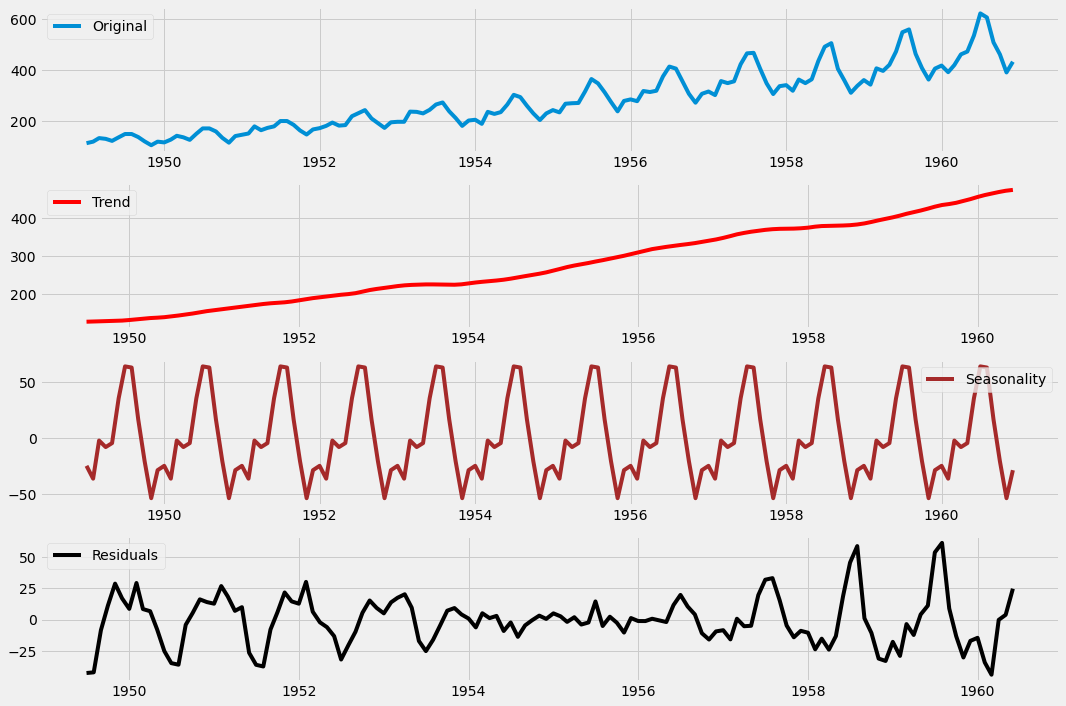

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(data)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend',color='red')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality',color='brown')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals',color='black')
plt.legend(loc='best')
plt.tight_layout(1)

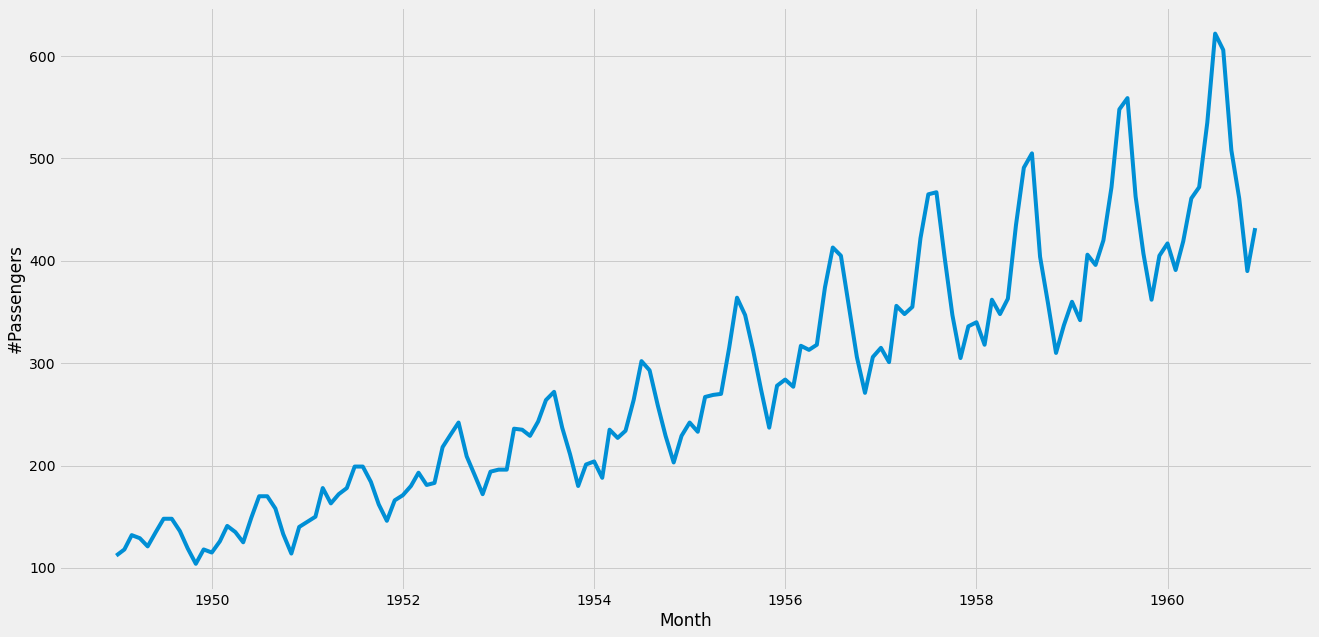

In [53]:
plt.figure(figsize=(20,10))
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.plot(data)

In [64]:
#using th method rolling from pandas library to leave a window of x (x=12) before start counting the mean/std
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(50))
print(rolstd.head(50))

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
1951-07-01   158.333333
1951-08-01   160.750000
1951-09-01   162.916667
1951-10-01   165.333333
1951-11-01   168.000000
1951-12-01   170.166667
1952-01-01   172.333333
1952-02-01   174.833333
1952-03-01   176.083333
1952-04-01   177

In [68]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test:')
dftest = adfuller(data['#Passengers'],autolag='AIC')
dfoutput =pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key]=value
print(dfoutput)

Dickey-Fuller Test:
Test Statistic           0.815369
p-value                  0.991880
Lags Used               13.000000
No. of Obs             130.000000
Critical Value(1%)      -3.481682
Critical Value(5%)      -2.884042
Critical Value(10%)     -2.578770
dtype: float64


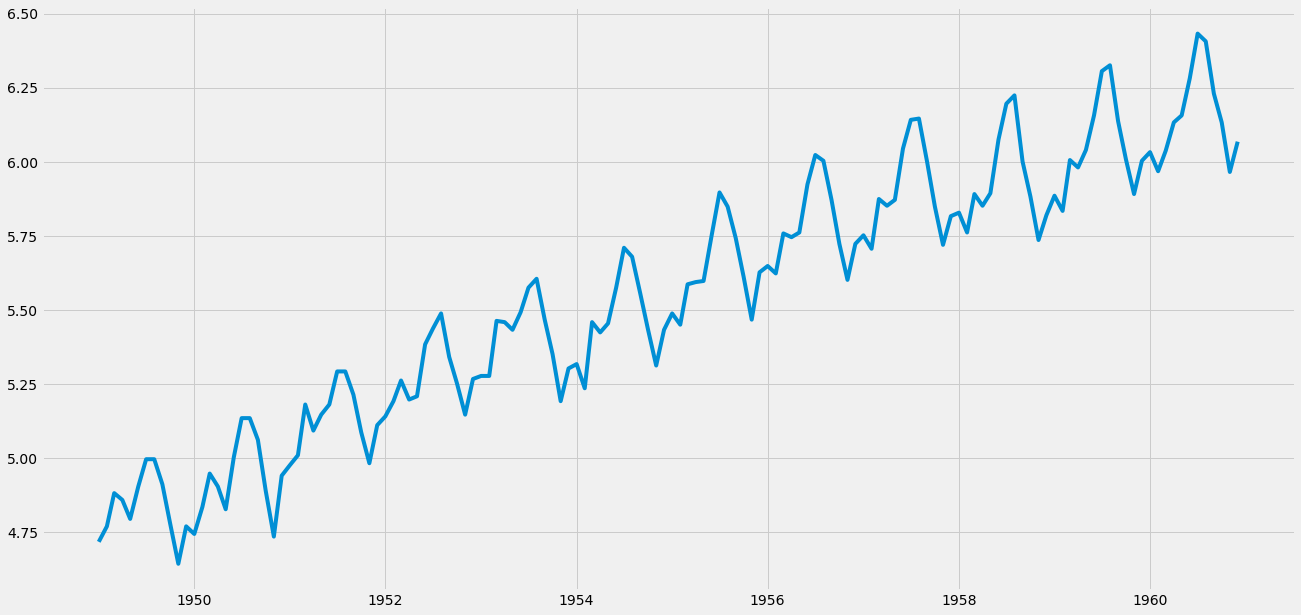

In [70]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)
plt.show()

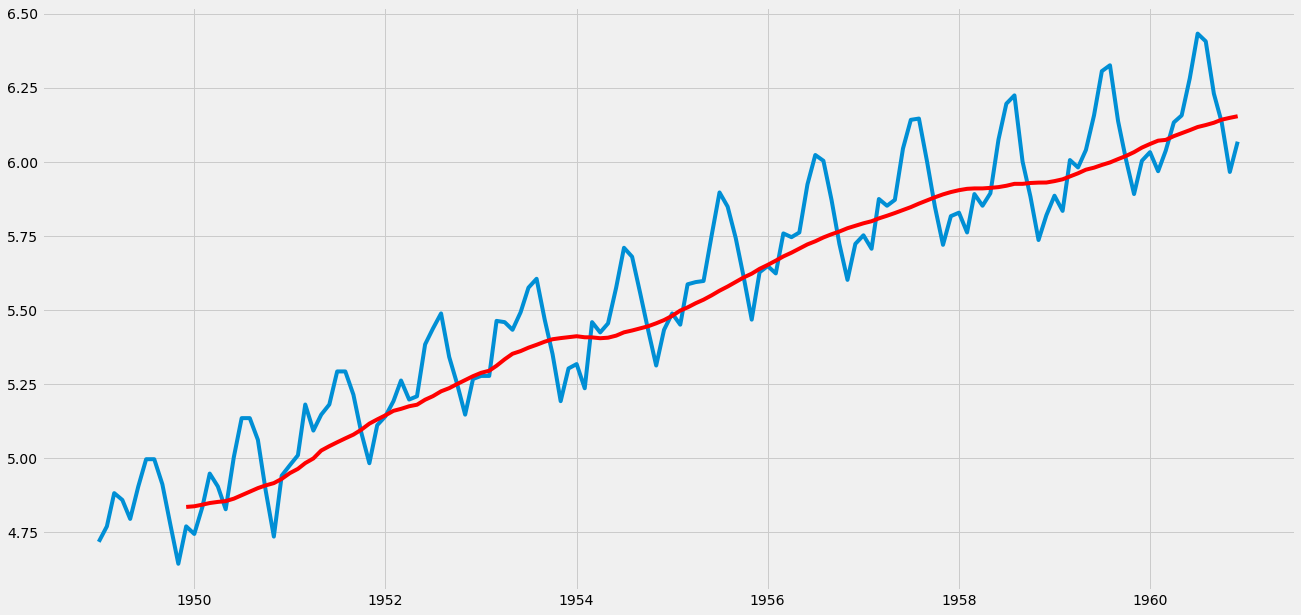

In [72]:
#plotting of the moving mean/std
plt.figure(figsize=(20,10))
Mavg=data_log.rolling(window=12).mean()
Mstd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(Mavg,color='red')
plt.show()

In [74]:
data_log_diff = data_log-Mavg
data_log_diff.head(24)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [76]:
data_log_diff = data_log_diff.dropna()
data_log_diff.head(24)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [88]:
def stationarity(timeseries):
    rolemean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual = plt.plot(timeseries,color='red', label='Actual')
    mean_6 = plt.plot(rolmean,color='green', label='Rolling Mean')
    std_6 = plt.plot(rolstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test:')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Statistic Test : ','p-value : ','Lags Used : ','No. of Obs : '])
    for key,value in dftest[4].items():
        dfoutput['Critical Value :(%s) '%key] = value
    print(dfoutput)

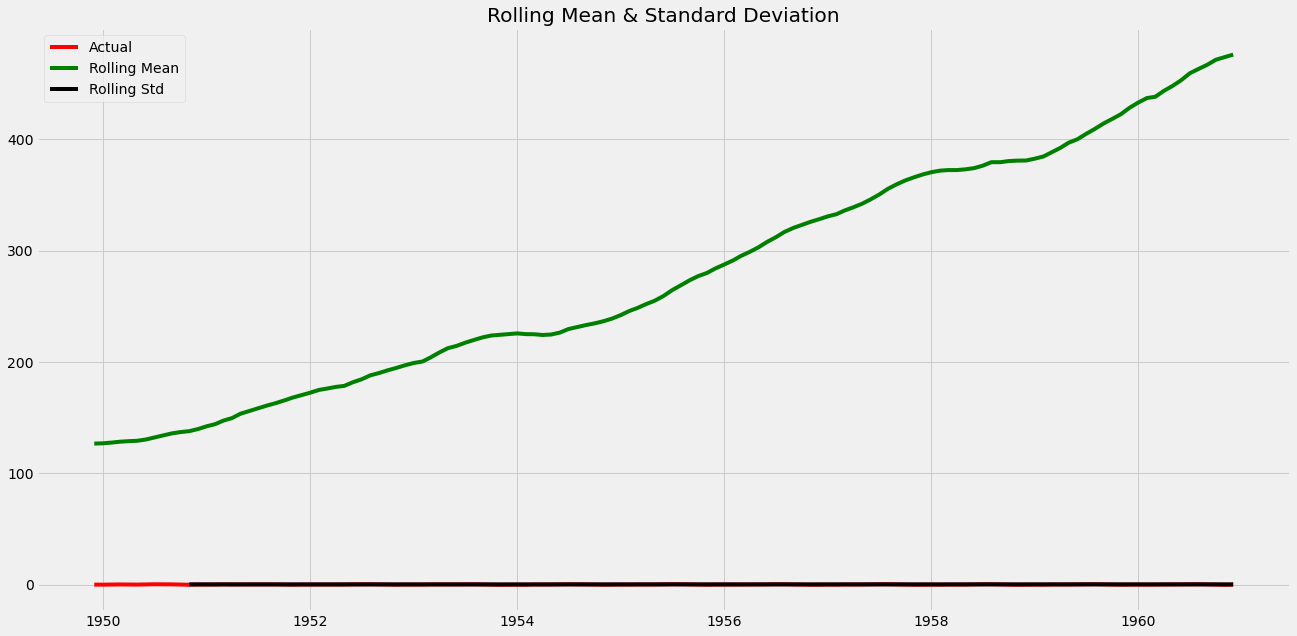

Dickey-Fuller Test:
Statistic Test :           -3.162908
p-value :                   0.022235
Lags Used :                13.000000
No. of Obs :              119.000000
Critical Value :(1%)       -3.486535
Critical Value :(5%)       -2.886151
Critical Value :(10%)      -2.579896
dtype: float64


In [89]:
stationarity(data_log_diff)